# Budget Analysis

In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import math
import sys
from pathlib import Path
import seaborn as sns
import numpy as np

# Add 'src' to the system path
sys.path.append(str(Path().resolve() / 'src'))
from src.data.process_data import *
from src.data.clean_data import *

from src.utils.data_utils import adjust_inflation

## Data loading

In [2]:
# from raw files, creates clean datafiles
# %run src/data/clean_data.py

In [3]:
# from clean data files, creates a dataframe with CMU + plots & TMDB movies 
df_tmdb = create_tmdb_dataset('data/processed/TMDB_clean.csv')

## 1. Movies budgets through the years

c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


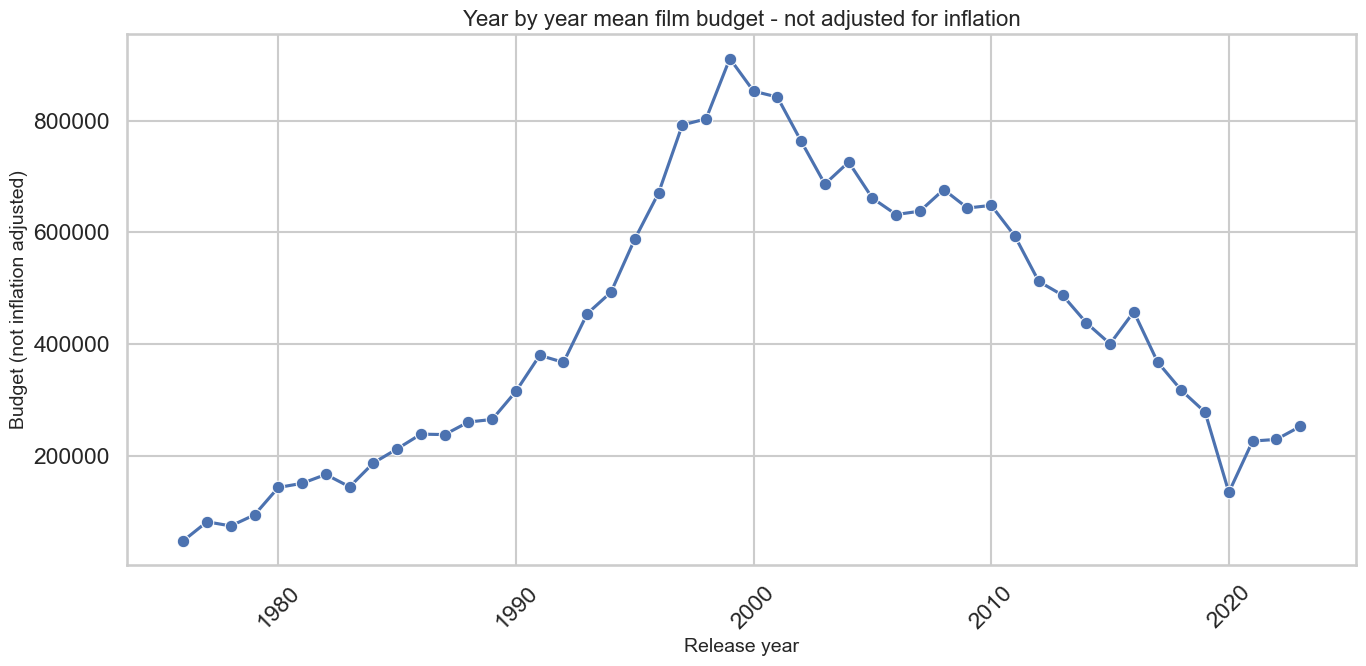

In [4]:
budget_stats = df_tmdb.groupby('release_year')['budget'].agg(mean_budget='mean').reset_index()

# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Plot the statistics
plt.figure(figsize=(14, 7))
sns.lineplot(data=budget_stats, x='release_year', y='mean_budget', marker='o')

# Customize the plot
plt.title('Year by year mean film budget - not adjusted for inflation', fontsize=16)
plt.xlabel('Release year', fontsize=14)
plt.ylabel('Budget (not inflation adjusted)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


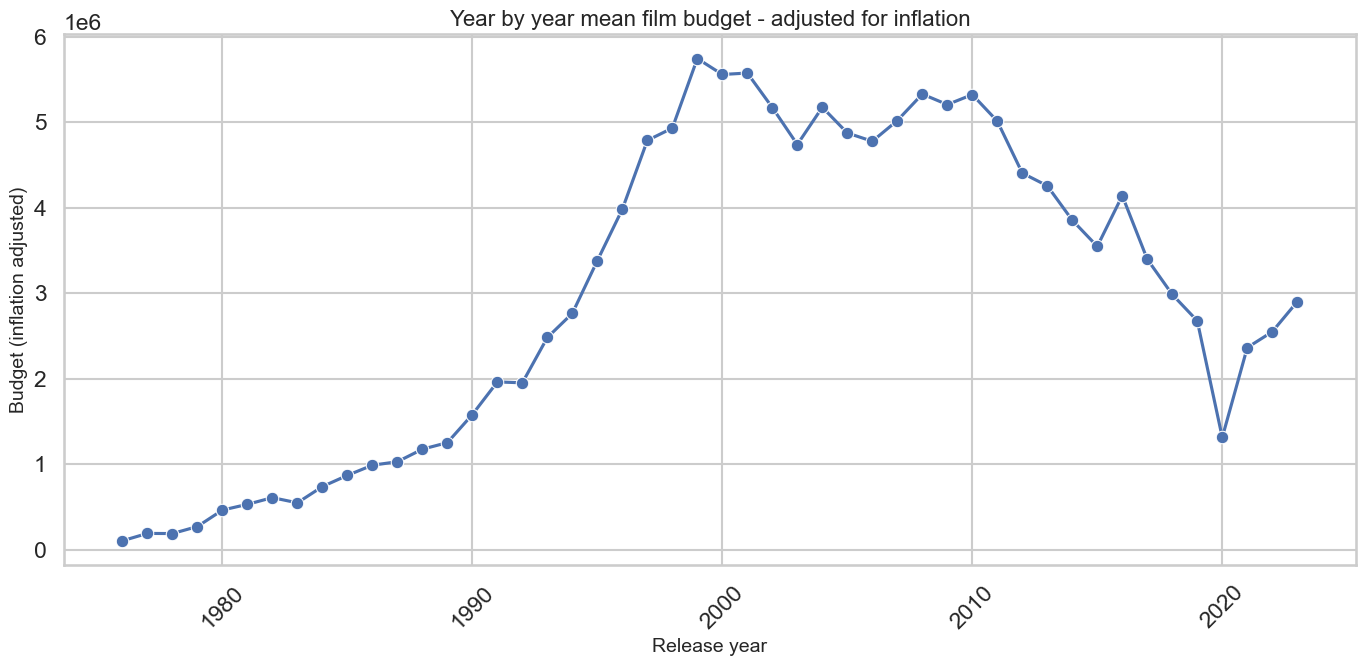

In [5]:
# Adjust the inflation for the budget statistics
budget_stats_inflation = adjust_inflation(budget_stats, old_col='mean_budget', new_col='mean_budget_inflation')

# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Plot the statistics
plt.figure(figsize=(14, 7))
sns.lineplot(data=budget_stats_inflation, x='release_year', y='mean_budget_inflation', marker='o')

# Customize the plot
plt.title('Year by year mean film budget - adjusted for inflation', fontsize=16)
plt.xlabel('Release year', fontsize=14)
plt.ylabel('Budget (inflation adjusted)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## 2. Movies budgets distributions 

c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

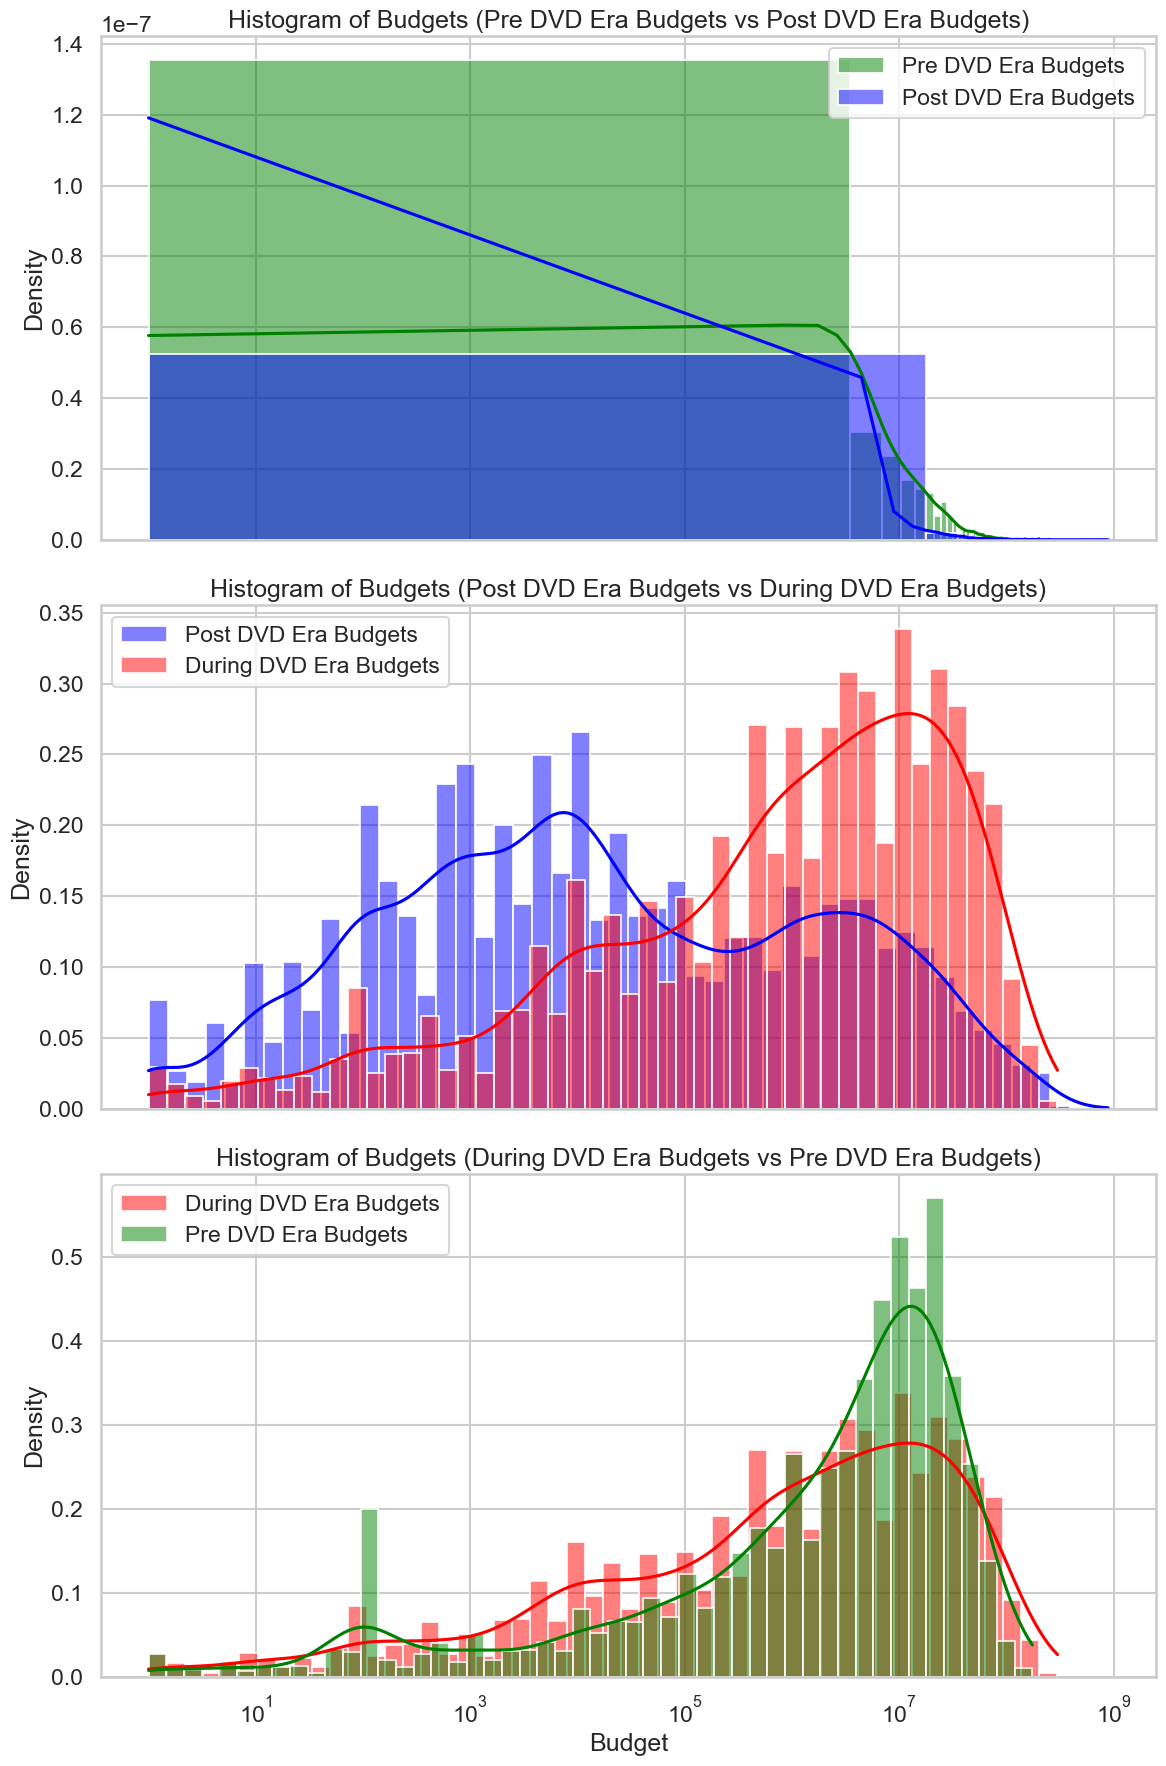

In [6]:
df_filtered = df_tmdb[(df_tmdb['budget'] > 0)]

def plot_histograms(df, eras, colors, labels, title):
    fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

    for i, (era1, era2) in enumerate(eras):
        ax = axes[i]
        sns.histplot(df[df['dvd_era'] == era1]['budget'], bins=50, color=colors[i][0], label=labels[i][0], ax=ax, kde=True, stat="density")
        sns.histplot(df[df['dvd_era'] == era2]['budget'], bins=50, color=colors[i][1], label=labels[i][1], ax=ax, kde=True, stat="density")
        ax.set_xscale('log')
        ax.set_xlabel('Budget')
        ax.set_ylabel('Density')
        ax.legend()
        ax.set_title(f'{title} ({labels[i][0]} vs {labels[i][1]})')

    plt.tight_layout()
    plt.show()

# Define eras, colors, and labels for the plots
eras = [("pre", "post"), ("post", "during"), ("during", "pre")]
colors = [('green', 'blue'), ('blue', 'red'), ('red', 'green')]
labels = [('Pre DVD Era Budgets', 'Post DVD Era Budgets'), 
          ('Post DVD Era Budgets', 'During DVD Era Budgets'), 
          ('During DVD Era Budgets', 'Pre DVD Era Budgets')]

# Plot histograms
plot_histograms(df_filtered, eras, colors, labels, 'Histogram of Budgets')


## 3. Variations of mean budget through the years

c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

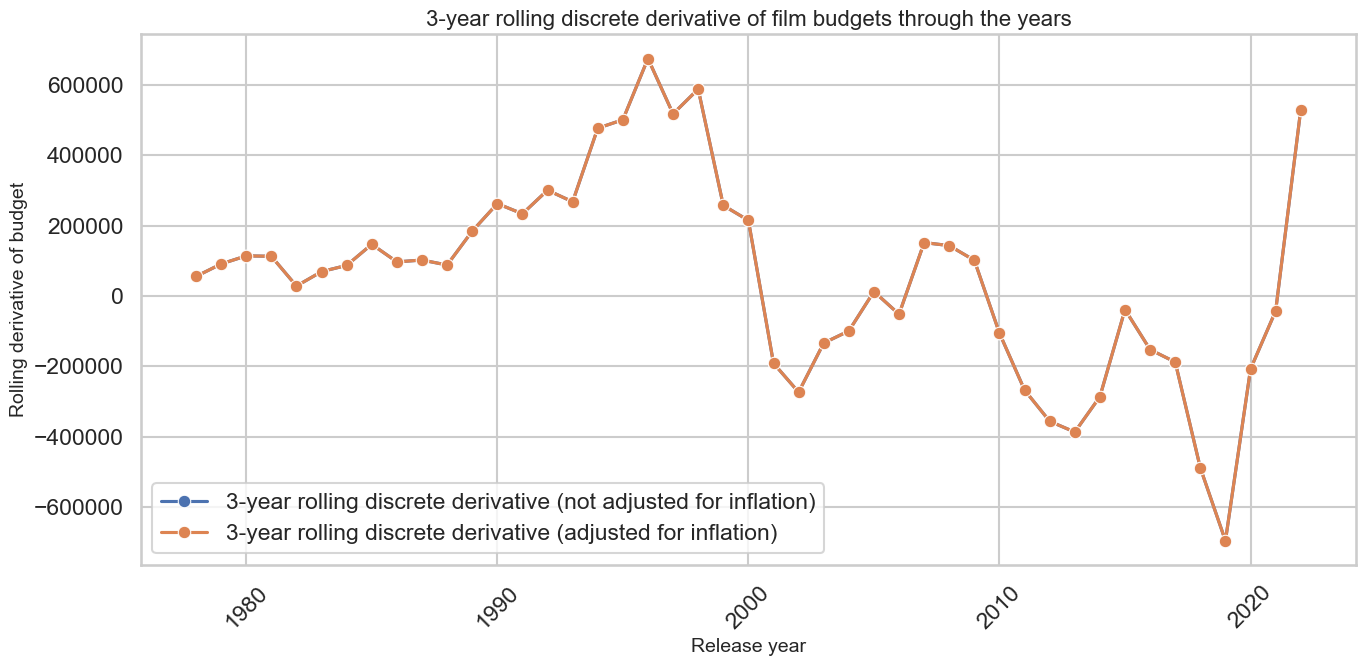

In [7]:
# Calculate the rolling derivative with a window of 3 years for both datasets
budget_stats['rolling_derivative'] = budget_stats['mean_budget'].diff().rolling(window=3, center=True).mean()
budget_stats_inflation['rolling_derivative'] = budget_stats_inflation['mean_budget_inflation'].diff().rolling(window=3, center=True).mean()

# Drop NaN values
budget_stats = budget_stats.dropna(subset=['rolling_derivative'])
budget_stats_inflation = budget_stats_inflation.dropna(subset=['rolling_derivative'])

# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Plot the rolling derivative for both datasets
plt.figure(figsize=(14, 7))
sns.lineplot(data=budget_stats, x='release_year', y='rolling_derivative', label='3-year rolling discrete derivative (not adjusted for inflation)', marker='o')
sns.lineplot(data=budget_stats_inflation, x='release_year', y='rolling_derivative', label='3-year rolling discrete derivative (adjusted for inflation)', marker='o')

# Customize the plot
plt.title('3-year rolling discrete derivative of film budgets through the years', fontsize=16)
plt.xlabel('Release year', fontsize=14)
plt.ylabel('Rolling derivative of budget', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

## 4. Proportions of different budget related categories through the years

c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

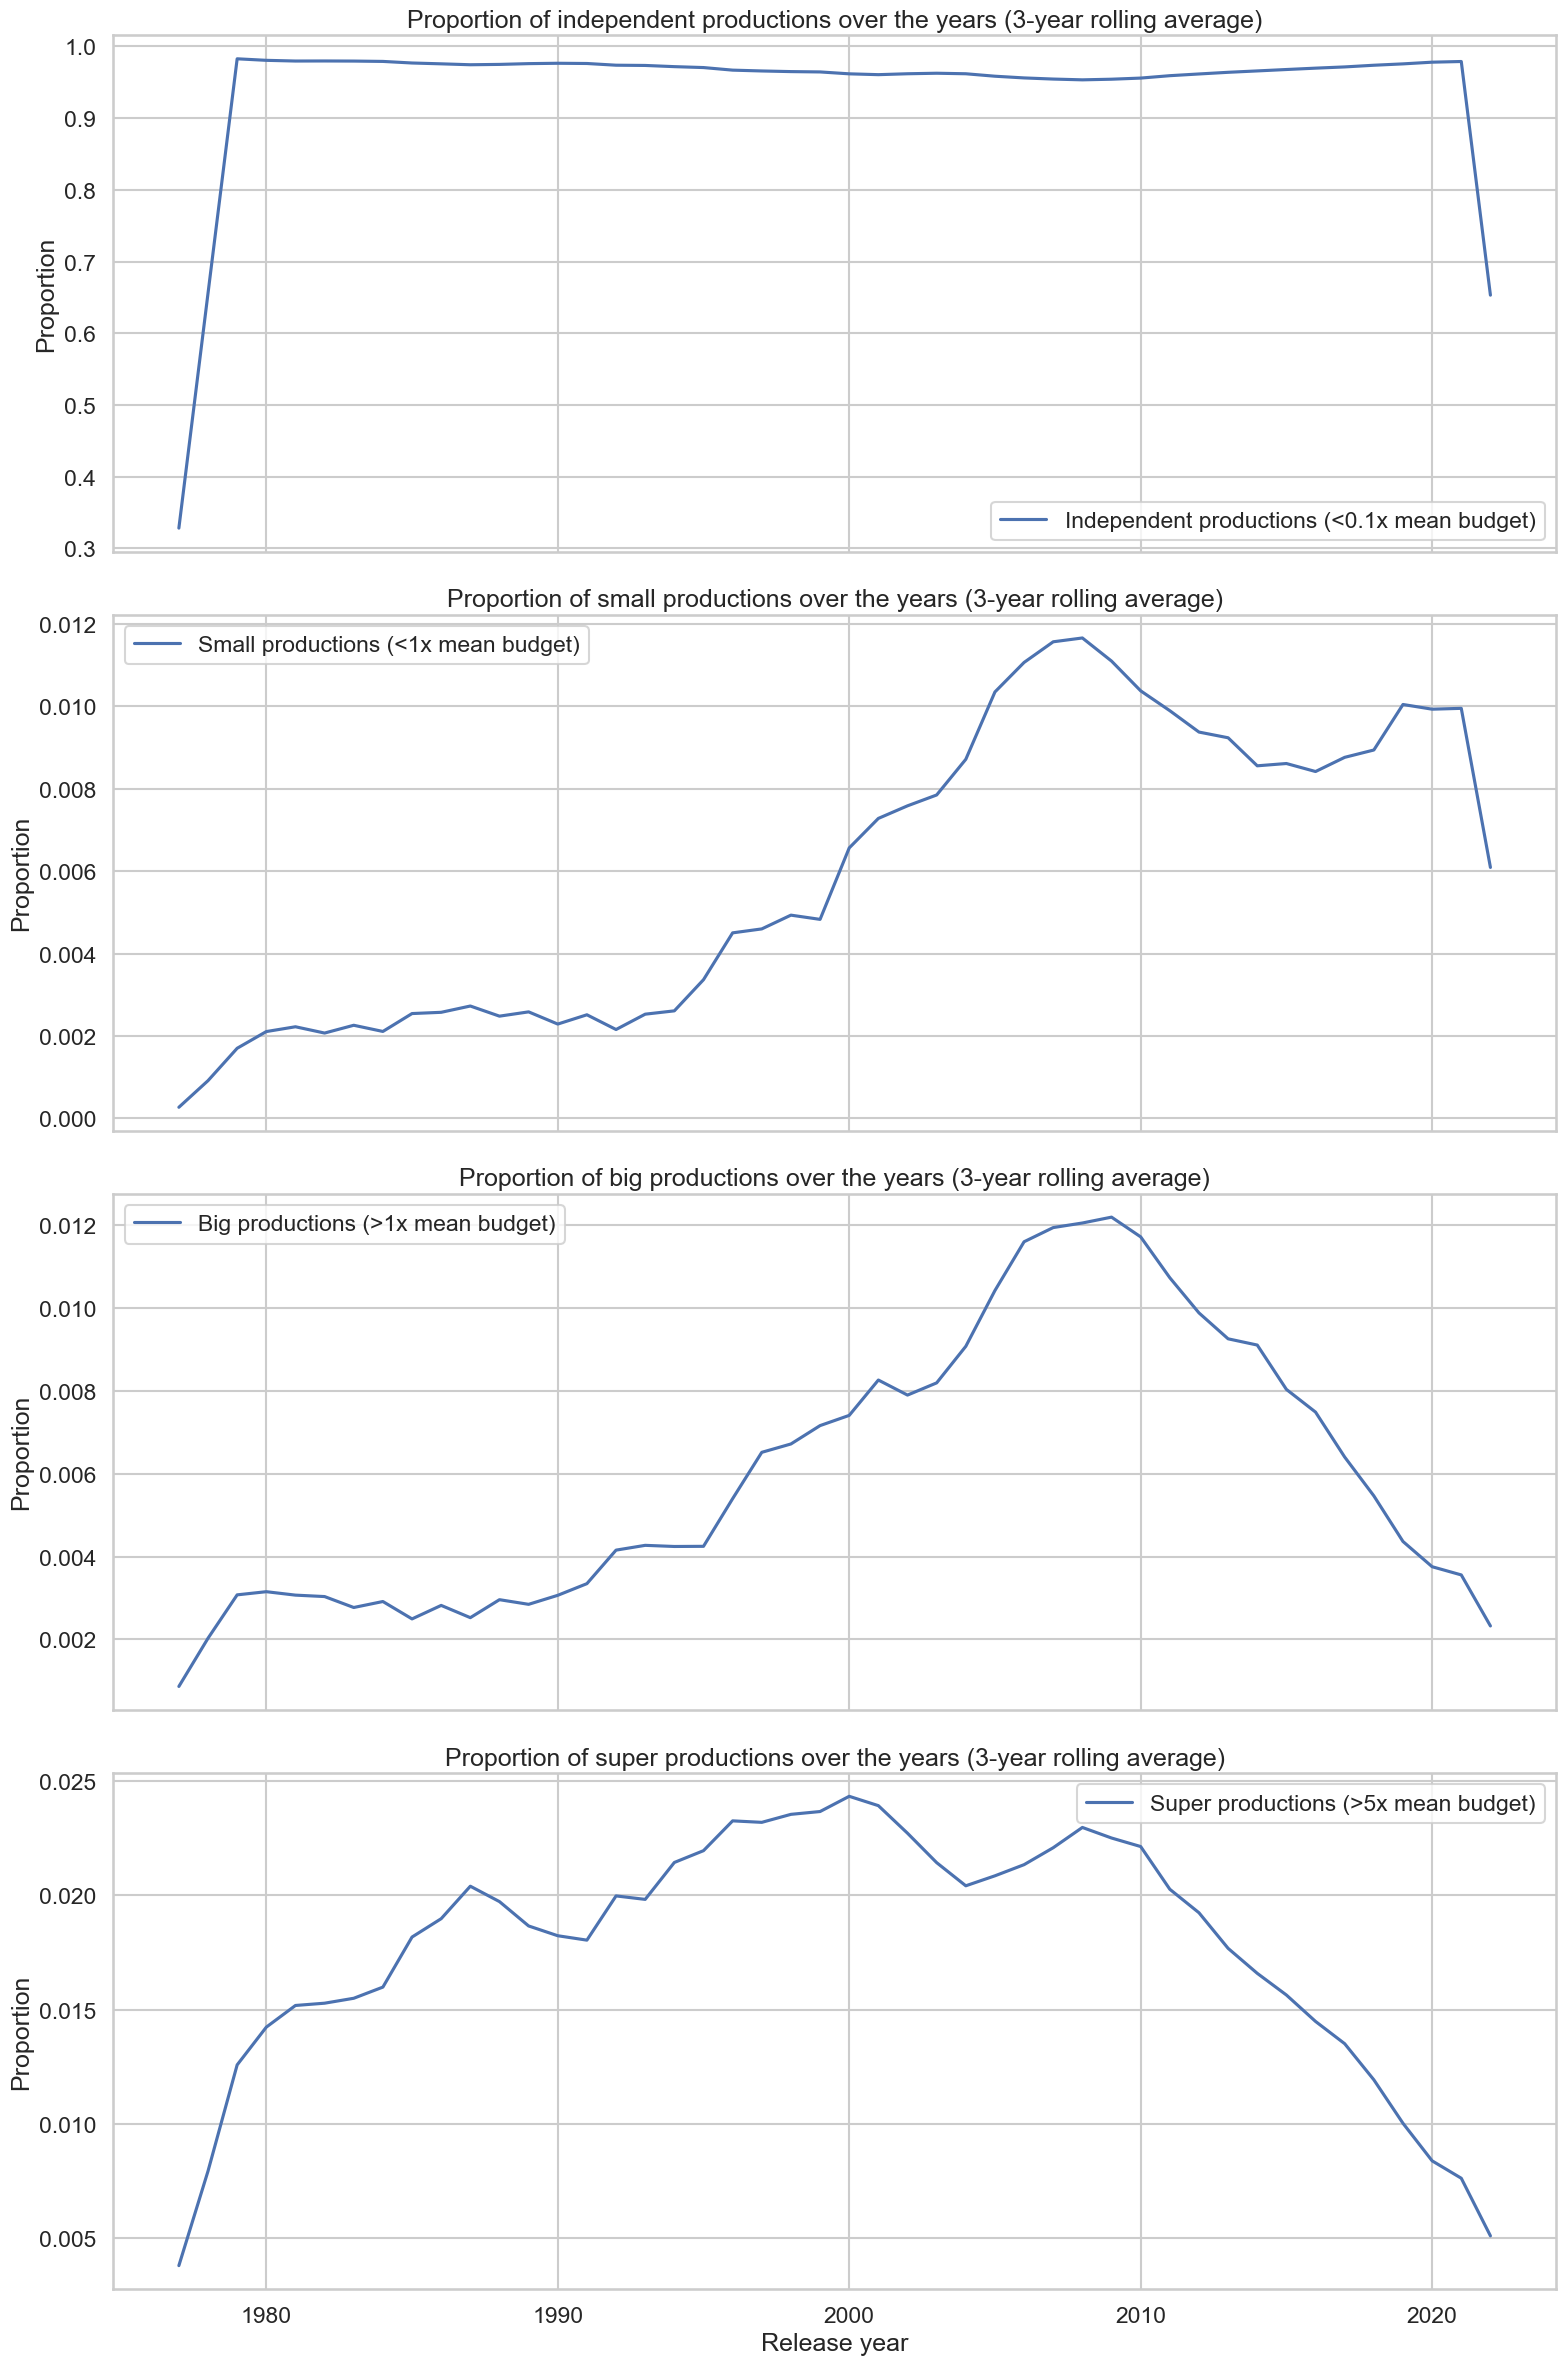

In [8]:
# Define budget categories
def categorize_budget(row):
    mean_budget_row = budget_stats.loc[budget_stats['release_year'] == row['release_year'], 'mean_budget']
    if mean_budget_row.empty:
        return 'Unknown'
    mean_budget = mean_budget_row.values[0]
    if row['budget'] < 0.1 * mean_budget:
        return 'Independent'
    elif row['budget'] < mean_budget:
        return 'Small'
    elif row['budget'] < 5 * mean_budget:
        return 'Big'
    else:
        return 'Super'

df_tmdb['budget_category'] = df_tmdb.apply(categorize_budget, axis=1)

# Count the number of each budget category per year
budget_category_counts = df_tmdb.groupby(['release_year', 'budget_category']).size().unstack(fill_value=0)

# Calculate the proportion of each budget category per year
budget_category_proportions = budget_category_counts.div(budget_category_counts.sum(axis=1), axis=0)

# Calculate the 3-year rolling average for each budget category
proportion_rolling = budget_category_proportions.rolling(window=3, center=True).mean()

# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Create a 4x1 grid of plots
fig, axes = plt.subplots(4, 1, figsize=(16, 24), sharex=True)

# Plot the proportion of independent productions over the years
sns.lineplot(data=proportion_rolling['Independent'], ax=axes[0], label='Independent productions (<0.1x mean budget)')
axes[0].set_title('Proportion of independent productions over the years (3-year rolling average)')
axes[0].set_xlabel('Release year')
axes[0].set_ylabel('Proportion')
axes[0].legend()

# Plot the proportion of small productions over the years
sns.lineplot(data=proportion_rolling['Small'], ax=axes[1], label='Small productions (<1x mean budget)')
axes[1].set_title('Proportion of small productions over the years (3-year rolling average)')
axes[1].set_xlabel('Release year')
axes[1].set_ylabel('Proportion')
axes[1].legend()

# Plot the proportion of big productions over the years
sns.lineplot(data=proportion_rolling['Big'], ax=axes[2], label='Big productions (>1x mean budget)')
axes[2].set_title('Proportion of big productions over the years (3-year rolling average)')
axes[2].set_xlabel('Release year')
axes[2].set_ylabel('Proportion')
axes[2].legend()

# Plot the proportion of super productions over the years
sns.lineplot(data=proportion_rolling['Super'], ax=axes[3], label='Super productions (>5x mean budget)')
axes[3].set_title('Proportion of super productions over the years (3-year rolling average)')
axes[3].set_xlabel('Release year')
axes[3].set_ylabel('Proportion')
axes[3].legend()

plt.tight_layout()
plt.show()
